In [113]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

In [114]:
pip install wquantiles

Note: you may need to restart the kernel to use updated packages.


In [115]:
try:
    import common
    DATA = common.dataDirectory()
except ImportError:
    DATA = Path().resolve() / 'data'

In [116]:
PATH = '/Users/rmbp/desktop/practical-statistics-for-data-scientists/data/'

In [117]:

AIRLINE_STATS_CSV = f'{PATH}airline_stats.csv'
KC_TAX_CSV = f'{PATH}kc_tax.csv.gz'
LC_LOANS_CSV = f'{PATH}lc_loans.csv'
AIRPORT_DELAYS_CSV = f'{PATH}dfw_airline.csv'
SP500_DATA_CSV = f'{PATH}sp500_data.csv.gz'
SP500_SECTORS_CSV = f'{PATH}sp500_sectors.csv'
STATE_CSV = f'{PATH}state.csv'

In [118]:
# Table 1-2
state = pd.read_csv(STATE_CSV)
print(state.head(8))

         State  Population  Murder.Rate Abbreviation
0      Alabama     4779736          5.7           AL
1       Alaska      710231          5.6           AK
2      Arizona     6392017          4.7           AZ
3     Arkansas     2915918          5.6           AR
4   California    37253956          4.4           CA
5     Colorado     5029196          2.8           CO
6  Connecticut     3574097          2.4           CT
7     Delaware      897934          5.8           DE


In [174]:
??pd.value_counts

In [122]:
np.average(state['Murder.Rate'], weights=state.Population)

4.445833981123393

In [191]:
from scipy.stats import trim_mean

In [193]:
trim_mean(state.Population, 0.10)

4783697.125

In [202]:
iqr = state.Population.quantile(0.75)-state.Population.quantile(0.25)
iqr

4847308.0

In [204]:
from statsmodels import robust

In [213]:
?robust.scale.mad

In [212]:
abs(state.Population - state.Population.median()).median()/ 0.6744897501960817

3849876.1459979336

In [223]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [242]:
state['Murder.Rate'].quantile([0.05,0.25,0.5,0.75,0.95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

In [246]:
percentile = [0.05,0.25,0.5,0.75,0.95]
df = pd.DataFrame(state['Murder.Rate'].quantile(percentile))
df.index = [f'{p * 100}%' for p in percentile]
df.T

,5.0%,25.0%,50.0%,75.0%,95.0%
Murder.Rate,1.6,2.425,4.0,5.55,6.51


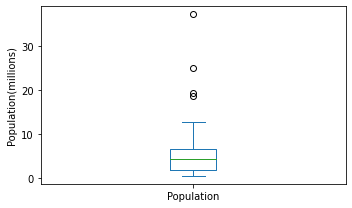

In [277]:
import matplotlib.pylab as plt
ax = (state['Population']/1_000_000).plot.box(figsize=(5,3))
ax.set_ylabel('Population(millions)')
plt.tight_layout()
plt.show()

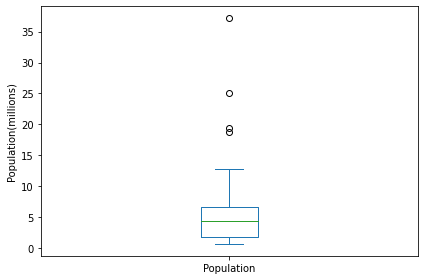

In [284]:
import matplotlib.pylab as plt
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population(millions)')
plt.tight_layout()
plt.show()

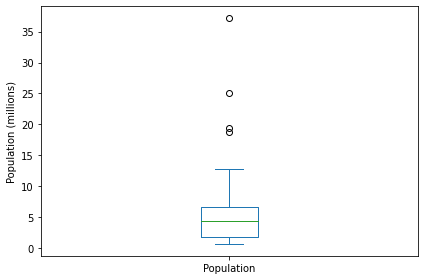

In [296]:
from matplotlib.pylab import plt
ax = (state['Population']/1_000_000).plot.box()
ax.set_ylabel('Population (millions)')
plt.tight_layout()
plt.show()

In [375]:
populationbinned = pd.cut(state['Population'],10)
populationbinned.name = 'binnedpopulation'
df = pd.concat([state, populationbinned],axis = 1).sort_values('Population')
groups = []
for group, state in df.groupby('binnedpopulation'):
    groups.append({
        'BinRange' : group ,
        'Count' : len(state) ,
        'States' : ','.join(state.Abbreviation)
    })
print(pd.DataFrame(groups))    
    

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                                                    States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,NV,UT,KS,AR,MS,IA,CT,OK,OR  
1                                KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                                        VA,NJ,NC,GA,MI,OH  
3                                                                    PA,IL  
4                                                                       FL  
5                                                                       NY  
6                                         

In [386]:
for group, state in df.groupby('binnedpopulation'):
    print({1 : state.Population , 2: ','.join(state.State)})

{1: 49     563626
44     625741
33     672591
1      710231
40     814180
7      897934
25     989415
38    1052567
28    1316470
18    1328361
10    1360301
11    1567582
26    1826341
47    1852994
30    2059179
27    2700551
43    2763885
15    2853118
3     2915918
23    2967297
14    3046355
6     3574097
35    3751351
36    3831074
Name: Population, dtype: int64, 2: 'Wyoming,Vermont,North Dakota,Alaska,South Dakota,Delaware,Montana,Rhode Island,New Hampshire,Maine,Hawaii,Idaho,Nebraska,West Virginia,New Mexico,Nevada,Utah,Kansas,Arkansas,Mississippi,Iowa,Connecticut,Oklahoma,Oregon'}
{1: 16    4339367
17    4533372
39    4625364
0     4779736
5     5029196
22    5303925
48    5686986
19    5773552
24    5988927
41    6346105
2     6392017
13    6483802
20    6547629
46    6724540
Name: Population, dtype: int64, 2: 'Kentucky,Louisiana,South Carolina,Alabama,Colorado,Minnesota,Wisconsin,Maryland,Missouri,Tennessee,Arizona,Indiana,Massachusetts,Washington'}
{1: 45     8001024
29    